# Synthetic Experiment
## Power and error evaluation
In this notebook we provide an example of the testing process using a simple toy problem.
We test the algorithm under the null hypothesis (i.e., the tested feature is not important)
and under the alternative (the tested feature is important), and report the algorithm rejection rate,
averaged over 100 realizations of the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data.data import get_pcr_data
from src.e_crt import EcrtTester
from src.utils import get_martingale_values

We generate the features using the following model:
\begin{align}
    Z_t &\sim \mathcal{N}(0,I_{d}), \\
    X_t \mid Z_t &\sim \mathcal{N}(u^\top Z_t,1), \quad \text{where} \quad u \sim \mathcal{N}(0,I_d),
\end{align}

The labels $Y$ are generated by:
\begin{align}
    Y_t \mid X_t,Z_t \sim \mathcal{N}((w^\top Z_t)^2+aX_t,1), \quad \text{where} \quad w \sim \mathcal{N}(0,I_d).
\end{align}

Where $a$ is set as follows:
- Under the null $a=0$.
- Under the alternative $a=3$.

In this experiment, we assume we have the whole data in advance, and demonstrate the use
of the algorithm in a non-sequential setting.
For a sequential testing example, please see [examples/fund_experiment.ipynb](examples/fund_experiment.ipynb).

In [2]:
j = 0  # In this setting, the tested feature is always the first one.
n_exp = 100  # We run the test 100 times on different realizations, in order to evaluate the power and the error.
seed_vec = np.arange(n_exp)
tests_list = ["power", "error"]
results_dict = {}
for test in tests_list:
    results_dict[test] = {
        "effective n": np.zeros((n_exp,)),
        "rejected": np.zeros((n_exp,))
                    }

In [3]:
for test in tests_list:
    rejected_vec = np.zeros((n_exp,))
    for ii, seed in enumerate(seed_vec):
        np.random.seed(seed)
        X, Y, beta = get_pcr_data(test=test, n=1000)
        ecrt_tester = EcrtTester(n_init=21, j=j)  # In this simple run, almost all the input parameters are the default ones.
        results_dict[test]["rejected"][ii] = ecrt_tester.run(X, Y)
        _, results_dict[test]["effective n"][ii] = get_martingale_values(ecrt_tester.martingale_dict)
    print(f"{test}  = {np.mean(results_dict[test]['rejected'])}")

power  = 0.85
error  = 0.01


The default test level is $\alpha = 0.05$. For $n=1000$ available time steps we achieved power of 0.85,
and controlled the type-I error. These results correlate to the results we presented in the paper,
in figures 3a and 3b.

We can also plot the histogram of the stopping times over the 100 realizations, and see
that in most runs we rejected the null at an early stage.

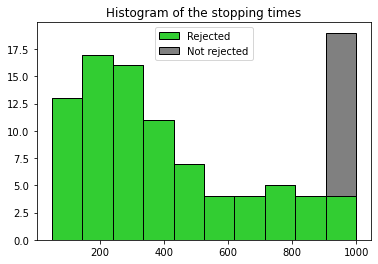

In [4]:
fig, ax = plt.subplots()
ax.hist([results_dict["power"]["effective n"][results_dict["power"]["rejected"]==True],
         results_dict["power"]["effective n"][results_dict["power"]["rejected"]==False]],
        color=["limegreen", "gray"], edgecolor="black", stacked=True,
        label=["Rejected", "Not rejected"])
plt.title("Histogram of the stopping times")
ax.legend()
plt.show()


